<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-R/blob/main/altura_tanque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Altura en tanque

Nombre: Juan Manuel G.G

Fecha: 19 de diciembre del 2020

Cargar librerías

In [2]:
install.packages("deSolve")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(deSolve)
library(ggplot2)

Establecer modelo

In [5]:
tank = function(time,state,parms){
  with(as.list(c(state,parms)),{

    dhdt = (c/(pho*A))*u
  
  return(list(c(dhdt)))
  })
}

Establecer parámetros 

In [14]:
p = c(c = 50, A = 1, pho = 100, u = 0)

Timepo de integración

In [8]:
t = seq(0,10,len=100)

Condiciones iniciales 

In [9]:
s = c(h = 0)

Establecer entradas 

In [10]:
u = rep(0,length(t))
u[21:70] = 1

Vector para guardar las alturas 

In [15]:
h = rep(0,length(t))

Utilizar un  ciclo for para realizar simulación e ir cambiando el valor de la entrada

In [16]:
for(i in 1:(length(t) - 1)) {

  ts = c(t[i],t[i+1])
  p["u"] = u[i]
  out = ode(y = s, times = ts, func = tank, parms = p, method = "rk4")
  s = out[2,2]
  h[i+1] = s
}

Guardar resultados 

In [18]:
data = data.frame(t=t,h=h,u=u)
write.csv(x = data, file = "altura.csv", row.names = FALSE)

Mostar resultados 

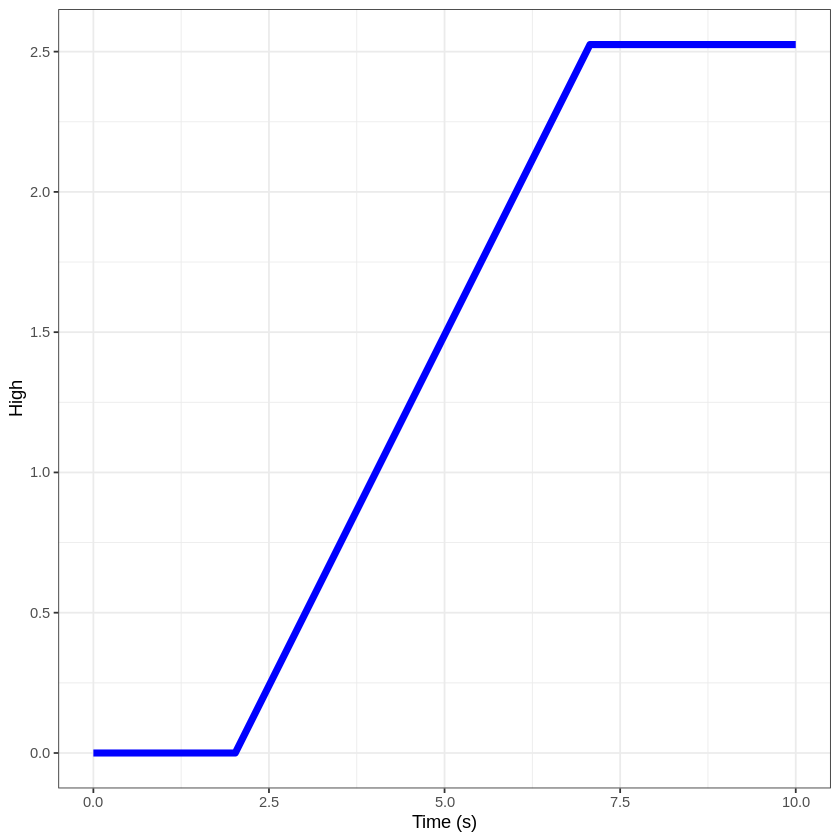

In [20]:
ggplot(data, aes(t)) +
        geom_line(aes(y = h), color = "blue", lwd = 2) +
        xlab("Time (s)") +
        ylab("High") +
        theme_bw()

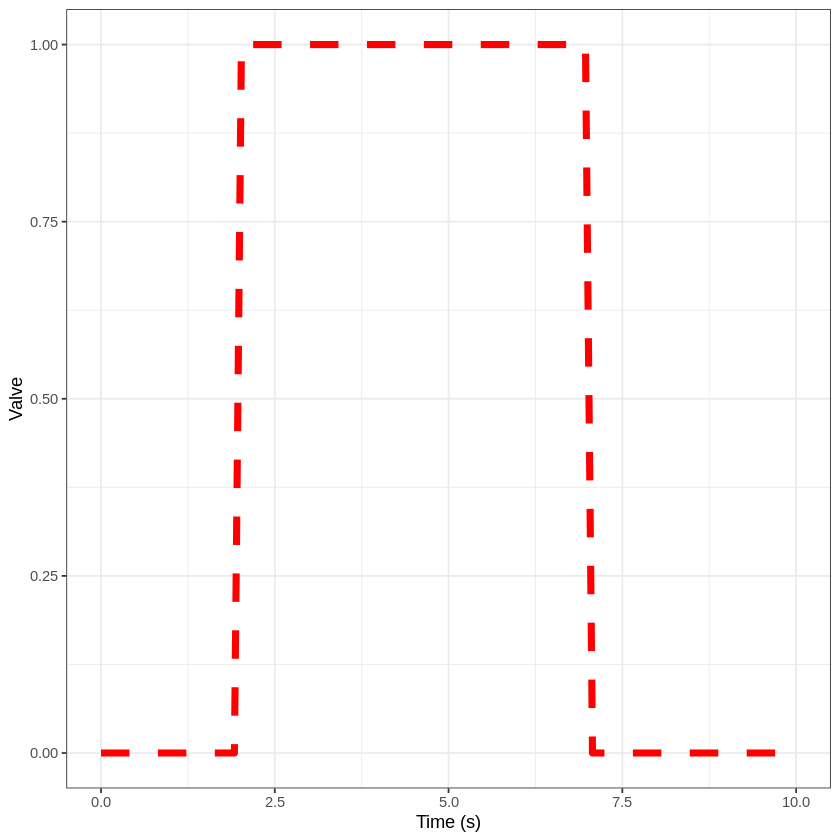

In [21]:
ggplot(data,aes(t)) +
        geom_line(aes(y = u), color = "red", lwd = 2, lty = 2) +
        xlab("Time (s)") +
        ylab("Valve") +
        theme_bw()